In [1]:
%matplotlib inline
import ot
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (8, 8)

# Mixture Gaussian 1D

In [76]:
#from ot.datasets import get_1D_gauss as gauss
n = 300
m1, s1, w1 = 5.5, 1, 0.5
m2, s2, w2 = 5.5, 1, 0.5

m3, s3, w3 = 4.5, 1, 0.5
m4, s4, w4 = 6.5, 1, 0.5

## Propose Cost

In [77]:
c1 = ((m1-m3)**2+(s1-s3)**2)
c2 = ((m2-m3)**2+(s2-s3)**2)

c3 = ((m1-m4)**2+(s1-s4)**2)
c4 = ((m2-m4)**2+(s2-s4)**2)

M = np.array([[c1, c3], [c2,c4]])
a = np.array([w1, w2])
b = np.array([w3, w4])
print('M =', M)
print('a =', a)
print('b =', b)

M = [[1. 1.]
 [1. 1.]]
a = [0.5 0.5]
b = [0.5 0.5]


In [78]:
Gs = ot.emd(a, b, M, numItermax=1e8)
Gs

array([[0. , 0.5],
       [0.5, 0. ]])

In [79]:
M_ = np.array([[c1, c3], [c2, c4]])
(Gs * M_).sum()

1.0

## Histogram

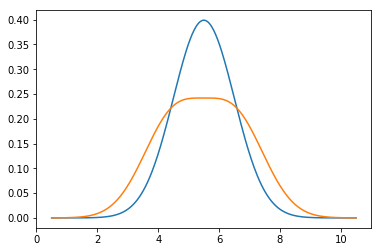

In [80]:
x = np.linspace(start=np.min([m1-4*s1, m2-4*s2, m3-4*s3, m4-4*s4]), 
                stop=np.max([m1+4*s1, m2+4*s2, m3+4*s3, m4+4*s4]), num=n)
#x = x[:200]
dx = (x[1]-x[0])
a = w1*norm.pdf(x, m1, s1) + w2*norm.pdf(x, m2, s2)
b = w3*norm.pdf(x, m3, s3) + w4*norm.pdf(x, m4, s4)
M_ = dx*ot.dist(x.reshape((len(x), 1)), x.reshape((len(x), 1)))
M = M_/M_.max()

plt.plot(x,a)
plt.plot(x,b)

/home/grios/anaconda3/lib/python3.6/site-packages/ot/lp/__init__.py:98: UserWarning: Problem infeasible. Check that a and b are in the simplex
  result_code_string = check_result(result_code)


0.0

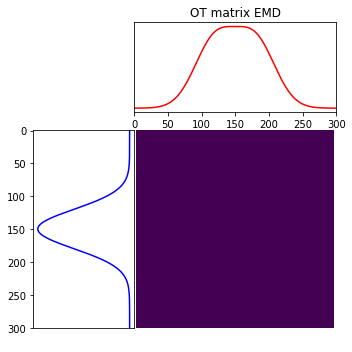

In [81]:
Gs = ot.emd(a, b, M)
plt.figure(1, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix EMD')
(Gs*M_).sum()

In [82]:
if False:
    lambd = 0.01
    Gs_reg = ot.sinkhorn(a, b, M, lambd, numInnerItermax=1e5, numItermax=1e5)
    plt.figure(1, figsize=(5, 5))
    ot.plot.plot1D_mat(a, b, Gs_reg, 'OT matrix Sinkhorn')
    plt.plot(Gs_reg.sum(axis=1))
    plt.plot(Gs_reg.sum(axis=0))
    (Gs_reg*M_).sum()

## Quantile

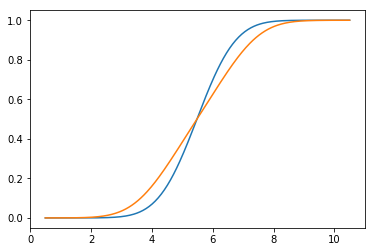

In [83]:
Fa = np.cumsum(a)*dx
Fb = np.cumsum(b)*dx

plt.plot(x, Fa)
plt.plot(x, Fb)

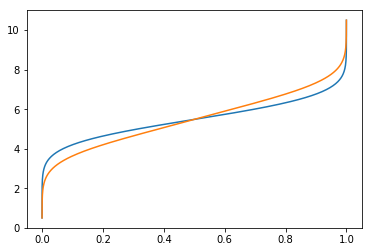

In [84]:
plt.plot(Fa, x)
plt.plot(Fb, x)

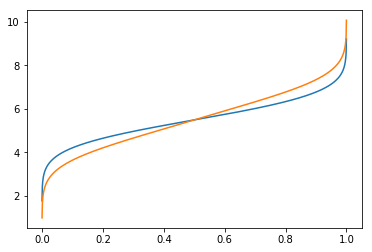

In [85]:
from scipy.interpolate import CubicSpline
Sa = CubicSpline(Fa, x)
Sb = CubicSpline(Fb, x)

u = np.linspace(0.0001,0.9999,1000)
du = u[1] - u[0]
plt.plot(u, Sa(u))
plt.plot(u, Sb(u))

In [86]:
du*np.sum((Sa(u) - Sb(u))**2)

0.17795744535205626